In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
pd.options.display.float_format ='{:,.2f}'.format
import numpy as np

data visualisation tools

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.family"]="DejaVu Sans"
import seaborn as sns
plt.style.use("seaborn-whitegrid")

##inline plotting
(to prevent warning)

In [ ]:
%matplotlib inline

##Import ML lib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


##Model Evaluation Tool

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

##Data Preprocessing

In [ ]:
df=pd.read_csv('wine_quality.csv')
df

,quality_score,wine_type,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
0,7.06,white,12.90,0.26,0.99,3.08,9.70,102.00,6.20
1,4.27,white,9.50,0.09,1.00,2.93,10.90,131.00,6.60
2,6.35,white,9.60,0.23,0.99,3.34,6.20,117.00,6.70
3,7.08,white,13.40,0.24,0.99,3.04,6.10,86.00,6.20
4,5.75,white,9.50,0.24,0.99,2.99,3.60,85.00,6.90
...,...,...,...,...,...,...,...,...,...
1653,7.61,red,10.90,0.07,1.00,3.38,2.50,9.00,7.50
1654,6.48,white,9.90,0.34,0.99,3.18,2.30,214.00,7.40
1655,6.47,white,9.90,0.30,0.99,3.20,6.70,125.00,7.00
1656,6.50,red,9.90,0.21,1.00,3.27,2.20,133.00,7.70


In [ ]:
df.describe()

,quality_score,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
count,"1,658.00","1,658.00","1,658.00","1,658.00","1,658.00","1,658.00","1,658.00","1,658.00"
mean,7.16,10.47,0.31,1.00,3.23,4.96,102.12,7.41
std,1.12,1.17,0.15,0.00,0.17,4.52,58.58,1.46
min,4.00,8.40,0.00,0.99,2.80,0.70,6.00,3.80
25%,6.41,9.50,0.23,0.99,3.12,1.80,50.00,6.50
50%,7.13,10.30,0.31,1.00,3.23,2.60,103.00,7.10
75%,7.92,11.30,0.40,1.00,3.34,7.20,144.00,8.00
max,10.00,14.90,0.81,1.00,4.01,26.05,440.00,15.90


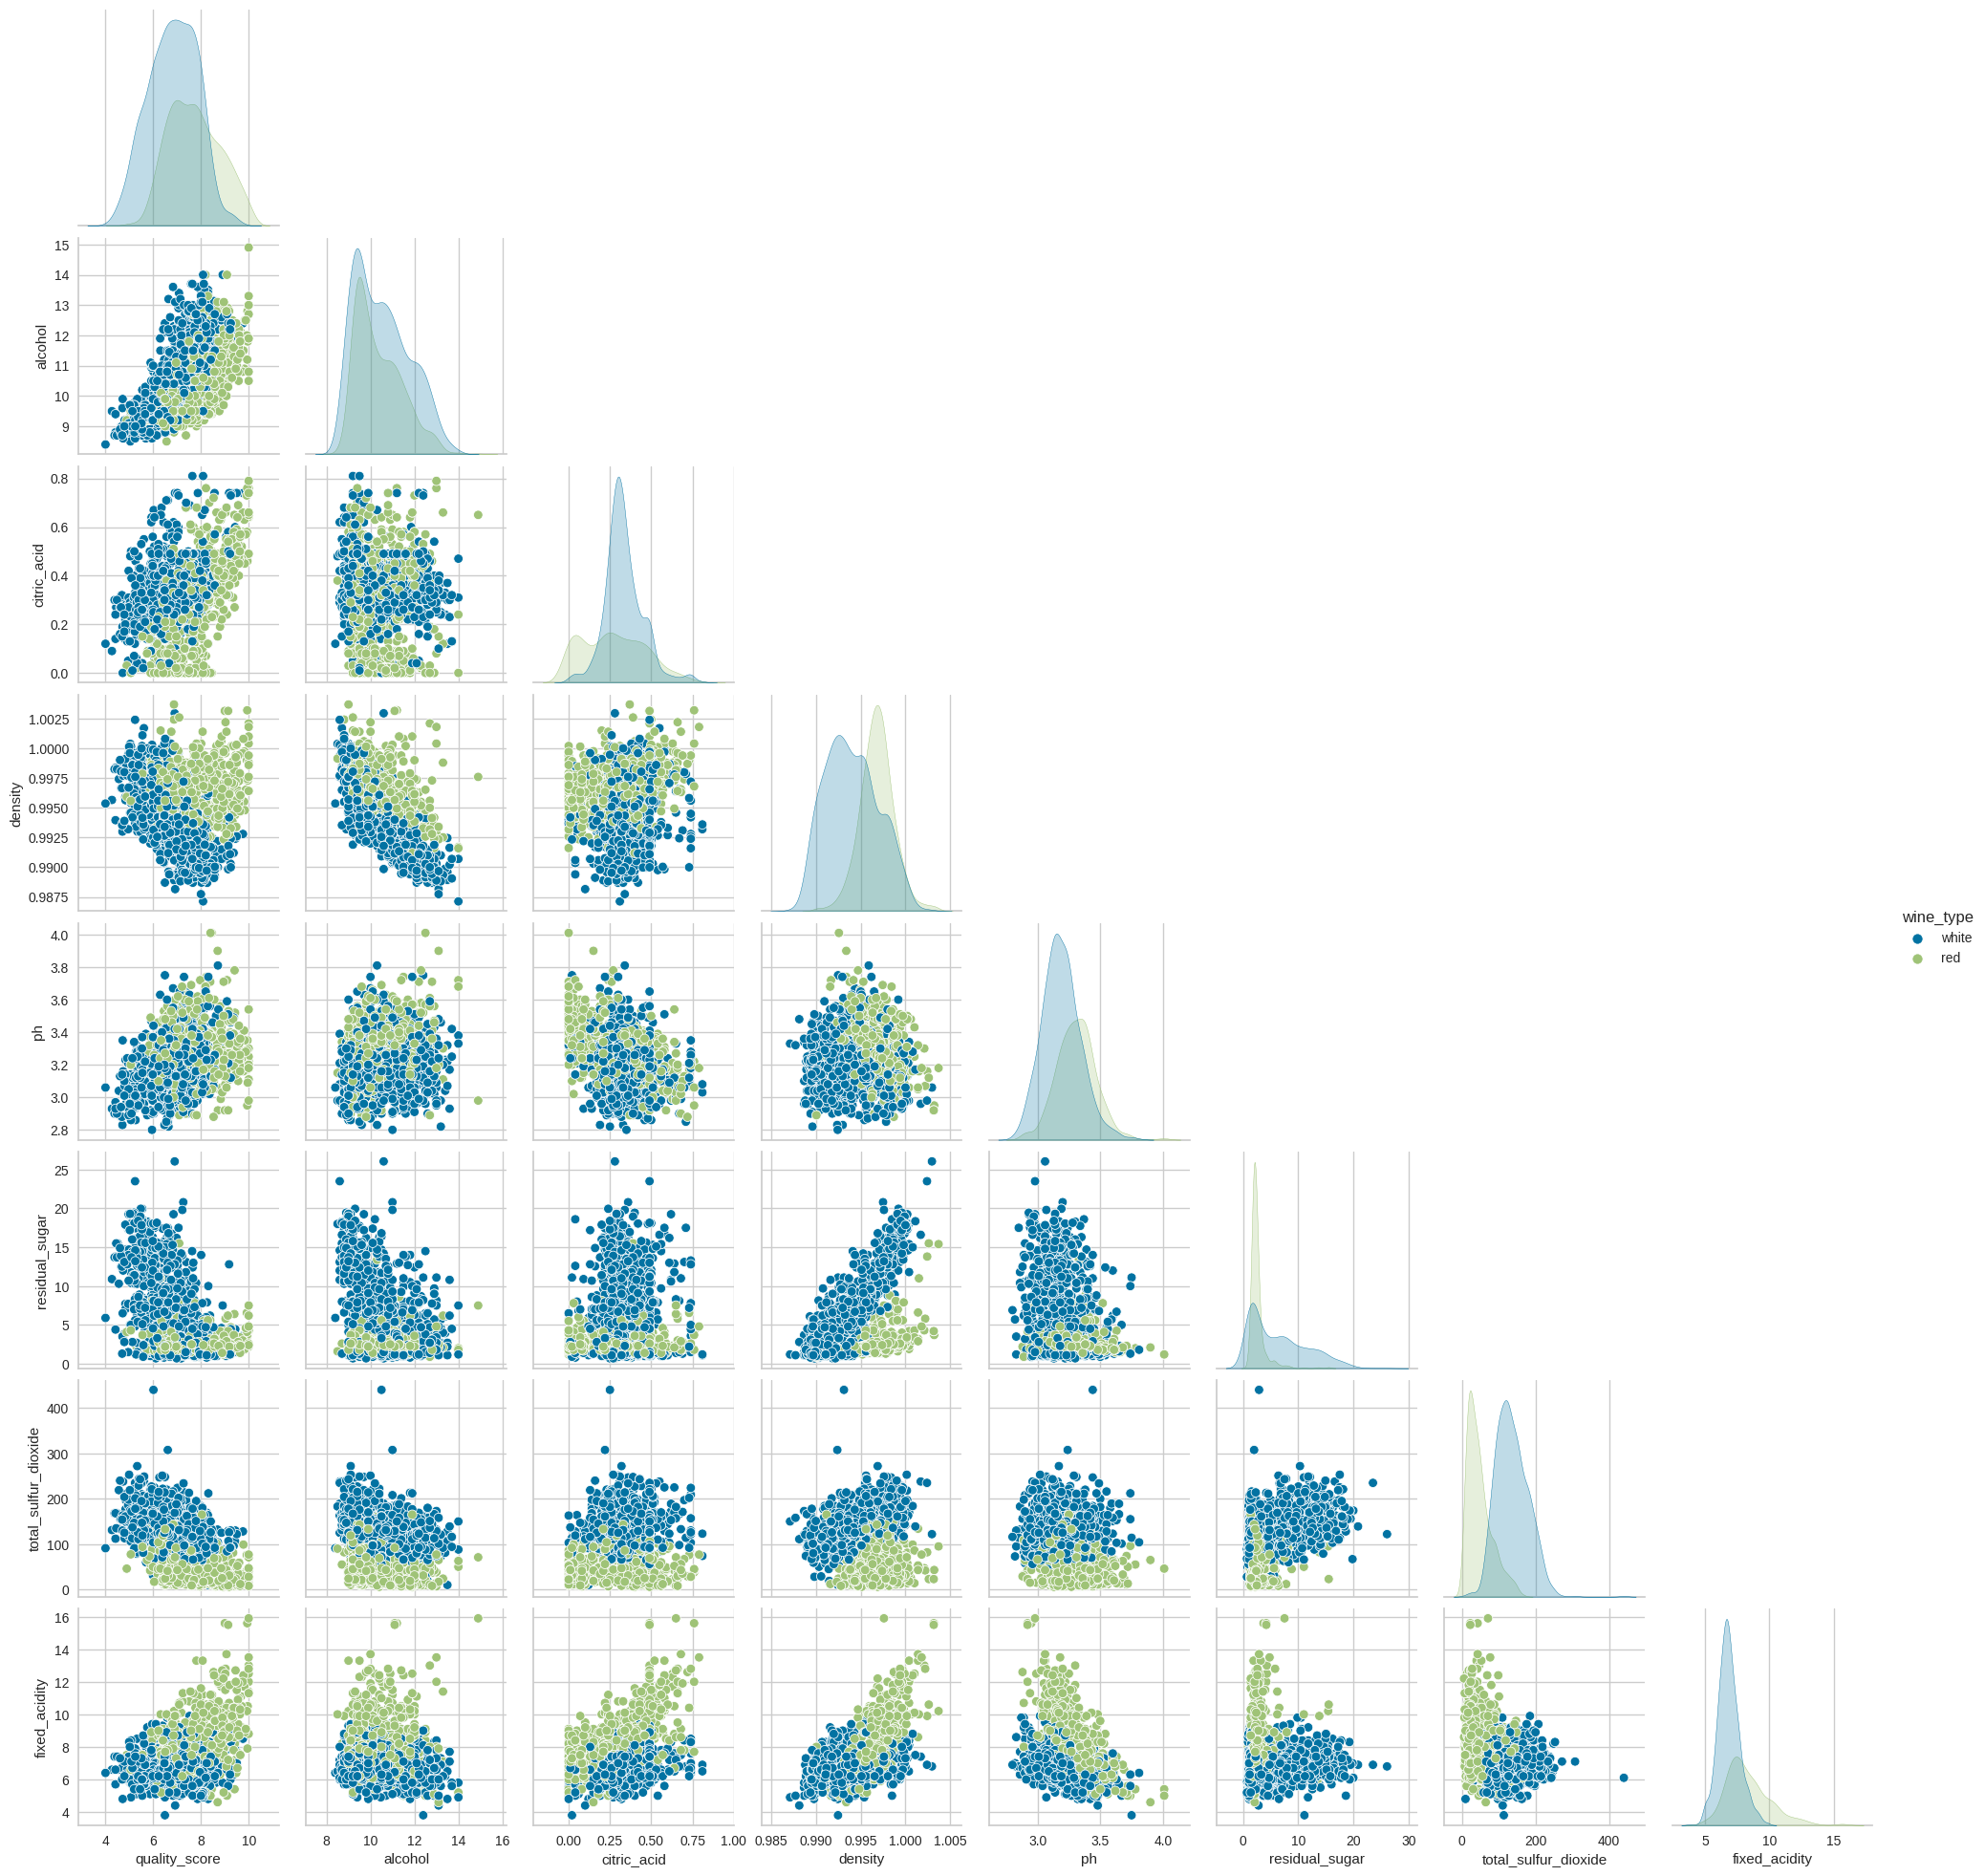

In [ ]:
sns.pairplot(
    df,hue="wine_type",corner=True
)

#sns sublot

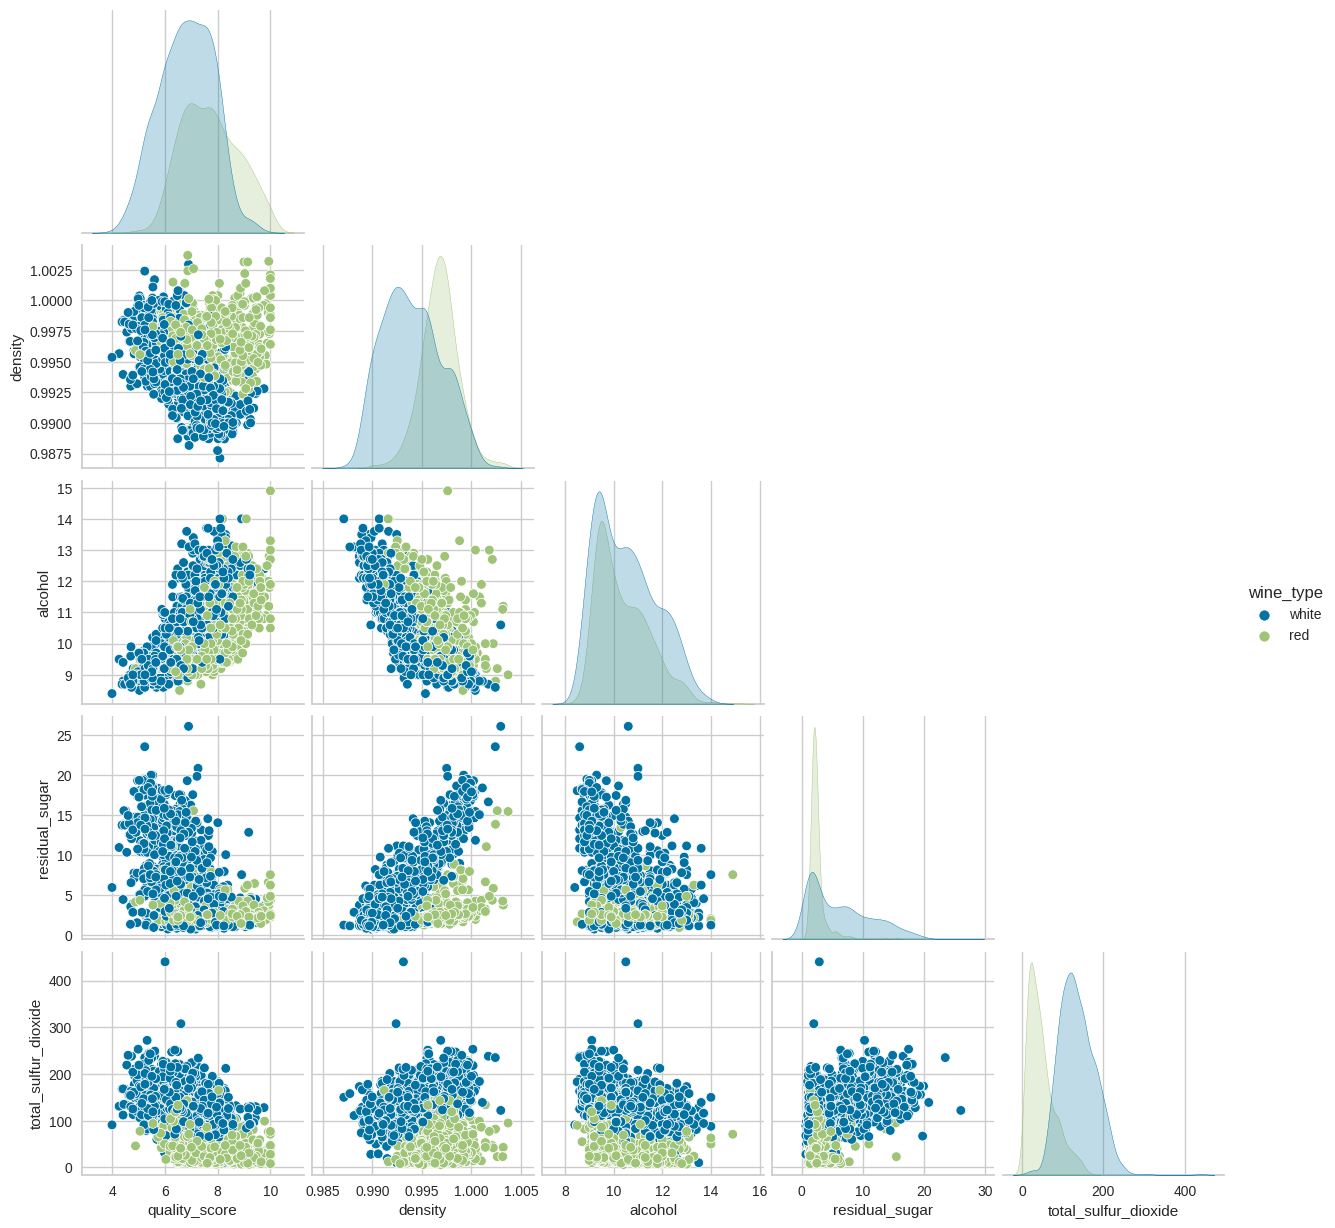

In [ ]:
sns.pairplot(
    df,hue="wine_type",corner=True,vars={'quality_score','alcohol','residual_sugar','density','total_sulfur_dioxide'}
)

In [ ]:
wine_corr_df=(
    df.corr()
)
wine_corr_df

,quality_score,alcohol,citric_acid,density,ph,residual_sugar,total_sulfur_dioxide,fixed_acidity
quality_score,1.00,0.64,0.40,-0.17,0.33,-0.53,-0.54,0.40
alcohol,0.64,1.00,0.03,-0.66,0.13,-0.32,-0.23,-0.10
citric_acid,0.40,0.03,1.00,0.07,-0.39,0.12,0.19,0.37
density,-0.17,-0.66,0.07,1.00,0.02,0.42,-0.08,0.53
ph,0.33,0.13,-0.39,0.02,1.00,-0.32,-0.28,-0.25
residual_sugar,-0.53,-0.32,0.12,0.42,-0.32,1.00,0.52,-0.15
total_sulfur_dioxide,-0.54,-0.23,0.19,-0.08,-0.28,0.52,1.00,-0.36
fixed_acidity,0.40,-0.10,0.37,0.53,-0.25,-0.15,-0.36,1.00


<Axes: >

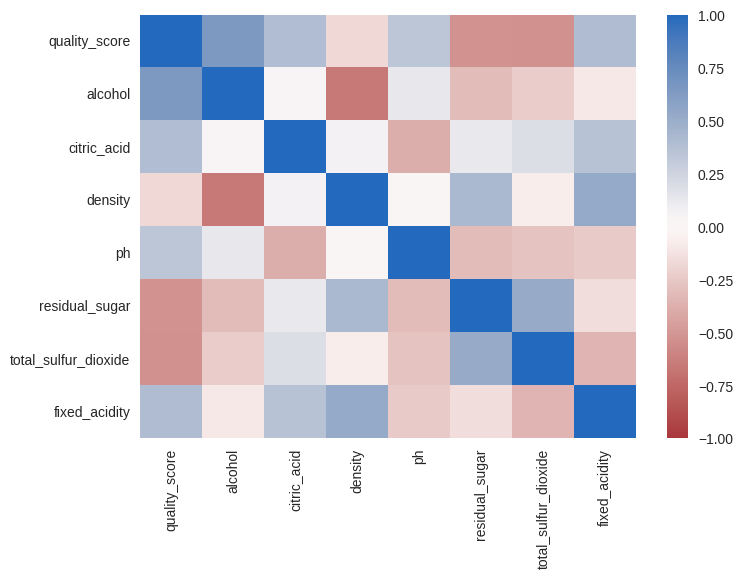

In [ ]:
sns.heatmap(wine_corr_df,cmap='vlag_r',vmin=-1,vmax=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["alcohol"]],
    df["quality_score"].values,
    train_size = 0.8,
    random_state=314
)

##Linear regression model

In [ ]:
wine_lm = LinearRegression()
wine_lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
'intercept: {:,.2f}.Slope: {:,.2f}'.format(wine_lm.intercept_,float(wine_lm.coef_))

'intercept: 0.51.Slope: 0.63'

##Model prediction



In [ ]:
y_train_pred = wine_lm.predict(x_train)
y_test_pred = wine_lm.predict(x_test)
pd.DataFrame({
    'quality_score': y_test,
    'predicted_qualuty_score': np.round( y_test_pred,2)
})

,quality_score,predicted_qualuty_score
0,9.18,8.25
1,6.66,7.49
2,7.34,6.92
3,6.42,7.17
4,5.34,6.22
...,...,...
327,6.05,6.54
328,5.86,6.35
329,9.44,7.74
330,8.20,6.48
